In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

In [32]:
!gdown 1ZS2sQYg0_JIELpOVW-SEaZnkTqKuYNne

Downloading...
From: https://drive.google.com/uc?id=1ZS2sQYg0_JIELpOVW-SEaZnkTqKuYNne
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 68.8MB/s]


In [33]:
data = pd.read_csv("/content/bike_sharing.csv")

Problem Statement : Need to identify which variables are significant in predicting the demand for shared electric cycles in the Indian market, and how those variables describe the electric cycle demands.

In [7]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
#Checking the shape of the data
data.shape

(10886, 12)

In [9]:
#checking for null values
data.isna().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
#checking the data types and non null counts of differrnt metrics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
#checking for unique values in each columns
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

Observations: datetime column has object data type, that need to be converted to date time data type. season, holiday, workingday and weather has limited unique values so changing it's data type to object to make it categorical variables.

In [12]:
#changing data type of 'datetime', 'season', 'holiday', 'workingday', 'weather' columns.
data['datetime'] = pd.to_datetime(data['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    data[col] = data[col].astype('object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [14]:
#checking for mean and median differnce to get an idea about outliers in the data
data.describe()


,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Observation: casual and registered columns might have outliers beacuse the mean and the median has significant difference. Also high standard deviation signifies that the variance in data for those columns are high.



In [15]:
#checking for the range of dates for which data is given.
data['datetime'].min(), data['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

Univariate Analysis

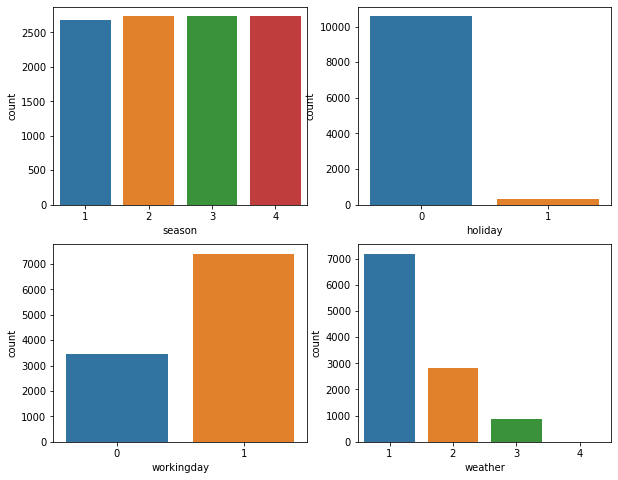

In [20]:
#checking for the contribution of each types of unique values for categorical variables.
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=data, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

Observations: Looking at above charts, we can infer that
1.   For each type of season, there is equal number of days.
2.   working days are significantly higher than holidays.
3.   Clear, Few clouds, partly cloudy, partly cloudy weather is significatly higher as compared to others.



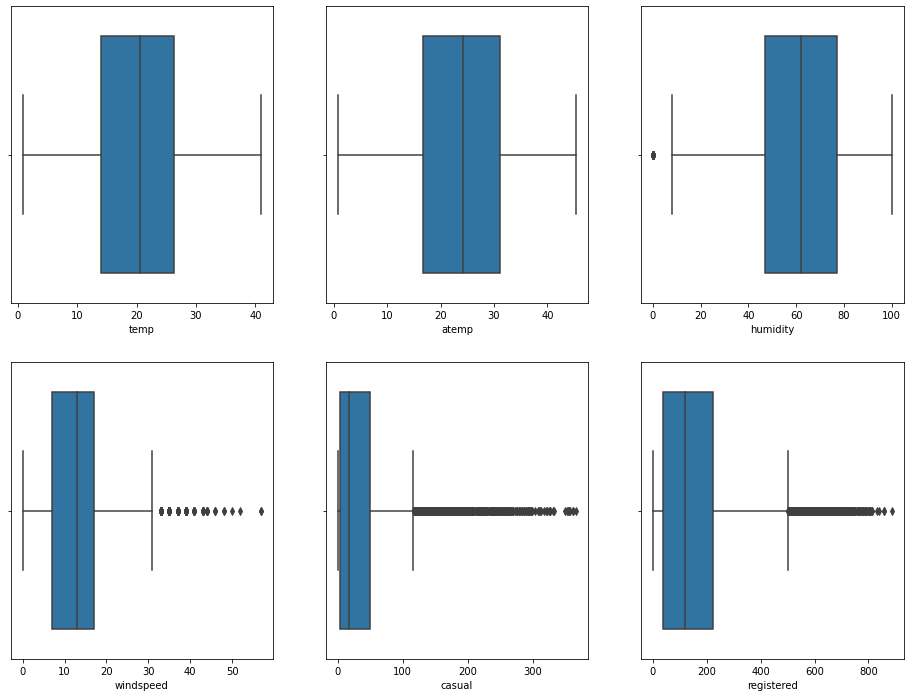

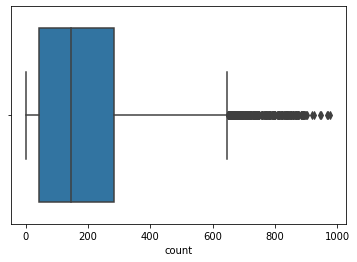

In [23]:
# checking outliers in the data for numerical columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=data[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=data[num_cols[-1]]) 
plt.show()

Observations: Looking at above charts, we can infer that humidity, windspeed, casual, registered and count have outliers in the data.


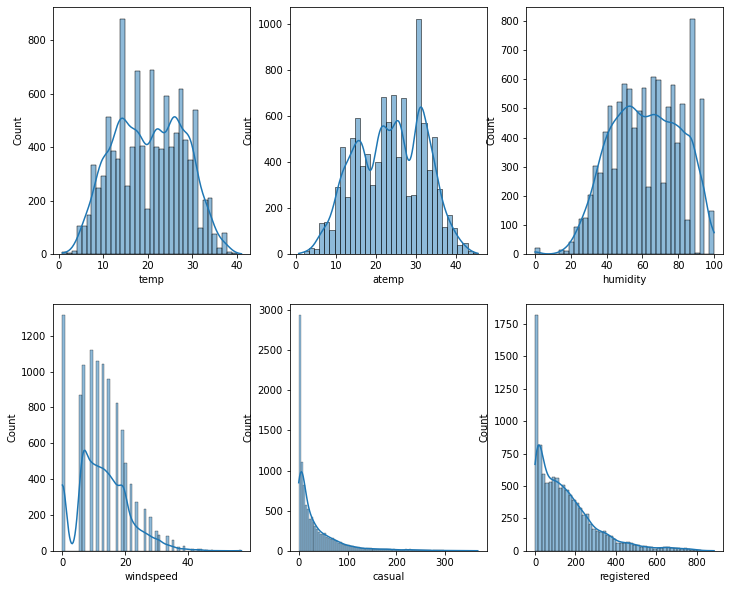

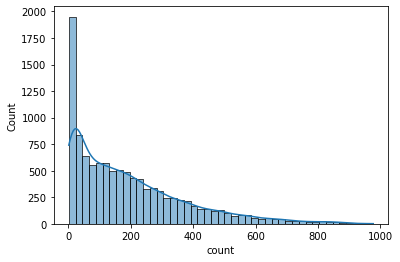

In [17]:
#understanding the distribution of numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(data[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(data[num_cols[-1]], kde=True) 
plt.show()

Observations:
Looking at above charts, we can infer that 
1.   temp, atemp and humidity looks like they follows the Normal Distribution.
2.   windspeed follows the binomial distribution.
3.   casual, registered and count somewhat looks like Log Normal Distrinution.




Bivariate Analysis

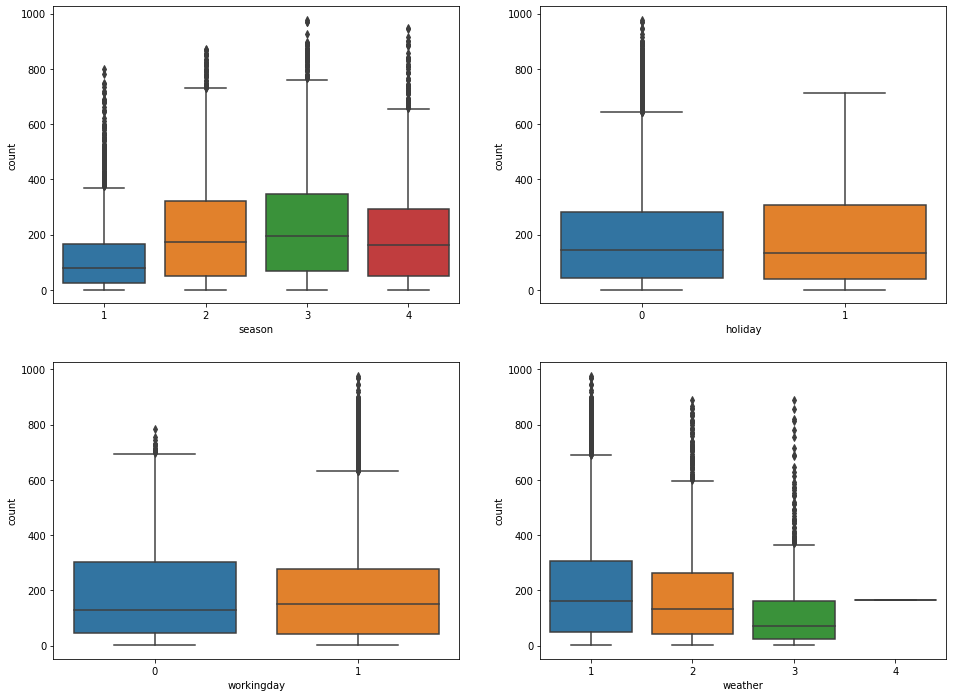

In [25]:
#boxplots for categorical variables againt count
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

Observations:
Looking at above charts, we can infer that 
1.   During summer, fall seasons more bikes are rented as compared to other seasons.
2.   During holiday or weekend, slightly more bikes were rented as compared to working day.
3.   During Clear, Few clouds, partly cloudy, partly cloudy there were higher number of bikes were rented.



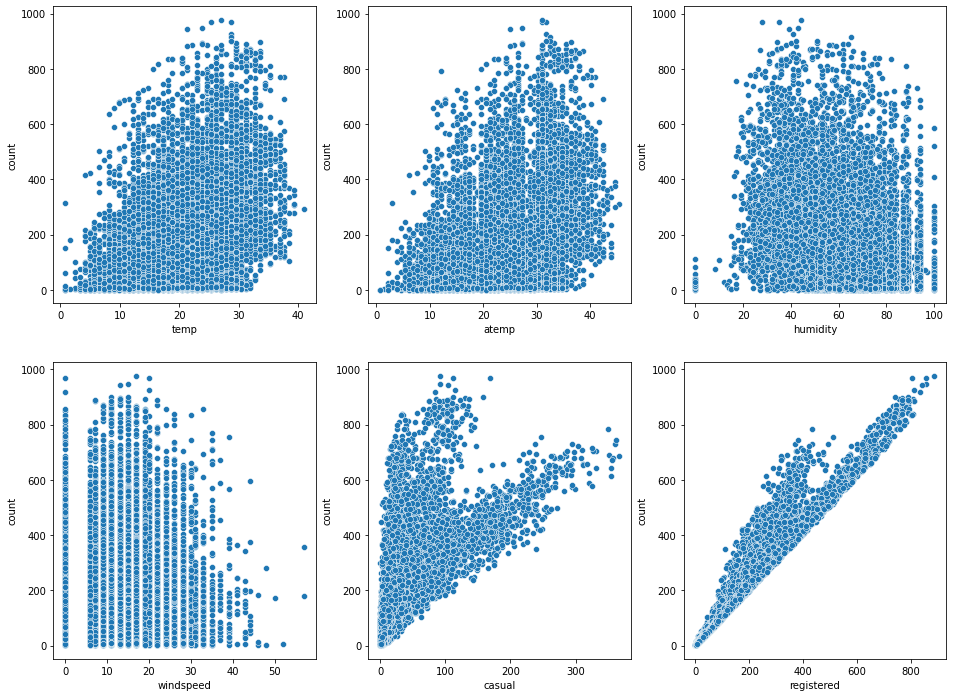

In [27]:
#scatterplot for numerical variables againt count 
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

Observations:
Looking at above charts, we can infer that 
1.   When the temperature is less than 10C and higher than 35C, number of bikes rented is very very low.
2.   When the humidity is less than 20, number of bikes rented is very very low.
3.   When the windspeed is greater than 30, number of bikes rented is less.


In [28]:
#checking the correlation between count and numerical variables 
df.corr()['count']

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

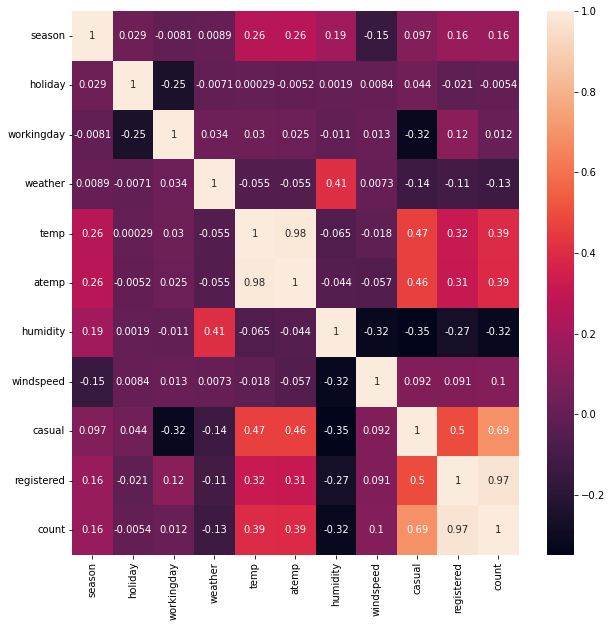

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observations:
From the above heatmap we can see the corelation between differnt attributes.

Hypothesis Testing - 1

Null Hypothesis (H0): Weather is independent of the season

Alternate Hypothesis (H1): Weather is not independent of the season

Significance level (alpha): 0.05

Using chi-square test to test hypyothesis defined above.

In [35]:
data_new = pd.crosstab(data['season'], data['weather'])
data_new

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [38]:
val = stats.chi2_contingency(data_new)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [41]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_new.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


Hypothesis Testing - 2

Null Hypothesis: Working day has no effect on the number of cycles being rented.

Alternate Hypothesis: Working day has effect on the number of cycles being rented.

Significance level (alpha): 0.05

using the 2-Sample T-Test to test the hypothess defined above

In [42]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [43]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

As the p-value is greater than 0.05 so we are failed to reject the Null hypothesis. We don't have  sufficient evidence to say that working day has effect on the number of cycles being rented.

Hypothesis Testing - 3

Null Hypothesis: Number of cycles rented is similar in different weather and season.

Alternate Hypothesis: Number of cycles rented is not similar in different weather and season.

Significance level (alpha): 0.05

using the ANOVA to test the hypothess defined above.

In [44]:
#defining the data groups for the ANOVA

gp1 = data[data['weather']==1]['count'].values
gp2 = data[data['weather']==2]['count'].values
gp3 = data[data['weather']==3]['count'].values
gp4 = data[data['weather']==4]['count'].values

gp5 = data[data['season']==1]['count'].values
gp6 = data[data['season']==2]['count'].values
gp7 = data[data['season']==3]['count'].values
gp8 = data[data['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

Business Insights:
1.   In summer and fall seasons more bikes are rented as compared to other seasons.
2.   Whenever its a holiday slightly more bikes are rented.
3.   It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
4.   Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
5.   Whenever the humidity is less than 20, number of bikes rented is very very low.
6.   When the temperature is less than 10C and higher than 35C, number of bikes rented is very very low.
7.   When the windspeed is greater than 30, number of bikes rented is less.











Recommendations:



1.   In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
2.   With a significance level of 0.05, workingday has no effect on the number of bikes being rented.
3.   In very low humid days, company should have less bikes in the stock to be rented. they can do the maintainance of the bikes on those days as the demand is less.
4.   Whenever temprature is less than 10 or in very cold days, company should have less bikes.
5.   Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.


 



